In [1]:
import accidentHandler
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
acc = accidentHandler.AccidentTable()

In [4]:
files = accidentHandler.findcsvlist('/home/louisf/Documents/Insight/massdriver/data/crash_data/')
acc.gatherdata(files)

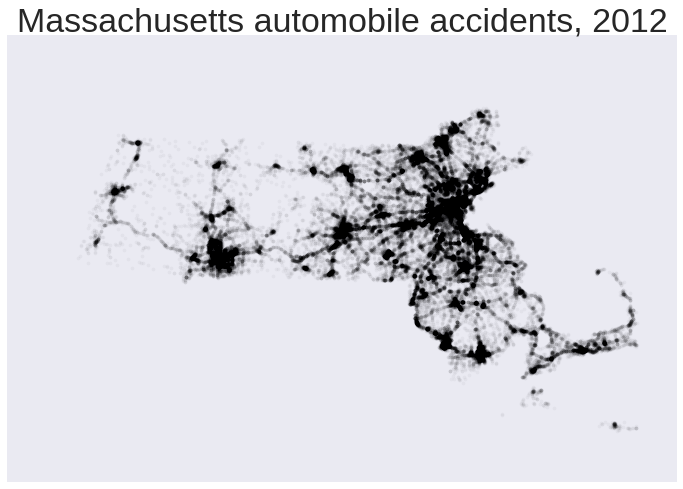

In [11]:
sb.set_context('talk')
fig = sb.regplot("X", "Y",acc.accidents, fit_reg=False, 
                 scatter_kws={"s":15, "alpha":.03, 'color':'k'})
fig.set(xticks=[], yticks=[])

fig.figure.set_size_inches(12,8)
fig.axes.set_title('Massachusetts automobile accidents, 2012', fontsize=34)
fig.set_xlabel("",size = 24)
fig.set_ylabel("",size = 24)


plt.savefig('/home/louisf/Documents/Insight/massdriver/analyses/cd_mass.png', dpi=300, bbox_inches="tight")

In [ ]:
acc.accidents.shape

In [ ]:
# accidents reporting location tags
isnu=pd.isnull(acc.accidents['Road Segment ID'])
acc.accidents.shape[0]-np.sum(isnu)

In [ ]:
# number of unique road segments
n = acc.accidents['Road Segment ID']
un = (n[~isnu]).unique()
un.shape

In [ ]:
f, ax = plt.subplots(figsize=(7, 7))

sb.distplot(n[~isnu].value_counts(), kde=False)
ax.set( yscale="log", xlabel='Number of accidents',
       ylabel='Number of road segments')
ax.set_title("Frequency of accidents on road segments")
plt.savefig('/home/louisf/Documents/Insight/massdriver/analyses/accFreq.png', dpi=300, bbox_inches="tight")

In [17]:
from mpl_toolkits import basemap

map = basemap.Basemap(llcrnrlon=69.5,llcrnrlat=41.1,urcrnrlon=73.5,urcrnrlat=43.,projection='laea', lat_0=42, lon_0=40)
map.readshapefile('/home/louisf/Documents/Insight/massdriver/data/raw/shapefile/RoadInventory', 'inven')

ValueError: readshapefile can only handle 2D shape types